In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [4]:
df = pd.read_csv('C:\\Users\\admin\\OneDrive - Chandigarh University\\Desktop\\ML training\\training data sets\\Train-Set.csv')

In [5]:
df.head()

ProductID  Weight FatContent  ProductVisibility            ProductType  \
0     FDA15    9.30    Low Fat           0.016047                  Dairy   
1     DRC01    5.92    Regular           0.019278            Soft Drinks   
2     FDN15   17.50    Low Fat           0.016760                   Meat   
3     FDX07   19.20    Regular           0.000000  Fruits and Vegetables   
4     NCD19    8.93    Low Fat           0.000000              Household   

        MRP OutletID  EstablishmentYear OutletSize LocationType  \
0  249.8092   OUT049               1999     Medium       Tier 1   
1   48.2692   OUT018               2009     Medium       Tier 3   
2  141.6180   OUT049               1999     Medium       Tier 1   
3  182.0950   OUT010               1998        NaN       Tier 3   
4   53.8614   OUT013               1987       High       Tier 3   

          OutletType  OutletSales  
0  Supermarket Type1    3735.1380  
1  Supermarket Type2     443.4228  
2  Supermarket Type1    2097.2700  
3      Grocery Store     732.3800  
4  Supermarket Type1     994.7052

In [6]:
df.shape

(8523, 12)

In [7]:
df.info

<bound method DataFrame.info of      ProductID  Weight FatContent  ProductVisibility            ProductType  \
0        FDA15   9.300    Low Fat           0.016047                  Dairy   
1        DRC01   5.920    Regular           0.019278            Soft Drinks   
2        FDN15  17.500    Low Fat           0.016760                   Meat   
3        FDX07  19.200    Regular           0.000000  Fruits and Vegetables   
4        NCD19   8.930    Low Fat           0.000000              Household   
...        ...     ...        ...                ...                    ...   
8518     FDF22   6.865    Low Fat           0.056783            Snack Foods   
8519     FDS36   8.380    Regular           0.046982           Baking Goods   
8520     NCJ29  10.600    Low Fat           0.035186     Health and Hygiene   
8521     FDN46   7.210    Regular           0.145221            Snack Foods   
8522     DRG01  14.800    Low Fat           0.044878            Soft Drinks   

           MRP Outl

In [37]:
df.describe()

ProductVisibility          MRP  EstablishmentYear   OutletSales
count        8523.000000  8523.000000        8523.000000   8523.000000
mean            0.066132   140.992782        1997.831867   2181.288914
std             0.051598    62.275067           8.371760   1706.499616
min             0.000000    31.290000        1985.000000     33.290000
25%             0.026989    93.826500        1987.000000    834.247400
50%             0.053931   143.012800        1999.000000   1794.331000
75%             0.094585   185.643700        2004.000000   3101.296400
max             0.328391   266.888400        2009.000000  13086.964800

In [9]:
df.isnull().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [12]:
df['Weight'].mean()

12.857645184135976

In [13]:
df['Weight'].fillna(df['Weight'].mean, inplace=True)

In [14]:
df.isnull().sum()

ProductID               0
Weight                  0
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [15]:
df['OutletSize'].mode()

0    Medium
Name: OutletSize, dtype: object

In [21]:
mode_of_outlet_size=df.pivot_table(values='OutletSize', columns='OutletType', aggfunc=(lambda x: x.mode()[0]))

In [22]:
print(mode_of_outlet_size)

OutletType Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
OutletSize         Small             Small            Medium            Medium


In [24]:
missing_values=df['OutletSize'].isnull()

In [25]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: OutletSize, Length: 8523, dtype: bool


In [26]:
df.loc[missing_values, 'OutletSize']=df.loc[missing_values, 'OutletType'].apply(lambda x: mode_of_outlet_size[x])

In [27]:
df.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [29]:
df.describe()

ProductVisibility          MRP  EstablishmentYear   OutletSales
count        8523.000000  8523.000000        8523.000000   8523.000000
mean            0.066132   140.992782        1997.831867   2181.288914
std             0.051598    62.275067           8.371760   1706.499616
min             0.000000    31.290000        1985.000000     33.290000
25%             0.026989    93.826500        1987.000000    834.247400
50%             0.053931   143.012800        1999.000000   1794.331000
75%             0.094585   185.643700        2004.000000   3101.296400
max             0.328391   266.888400        2009.000000  13086.964800

In [30]:
sns.set()

<Figure size 600x600 with 0 Axes>

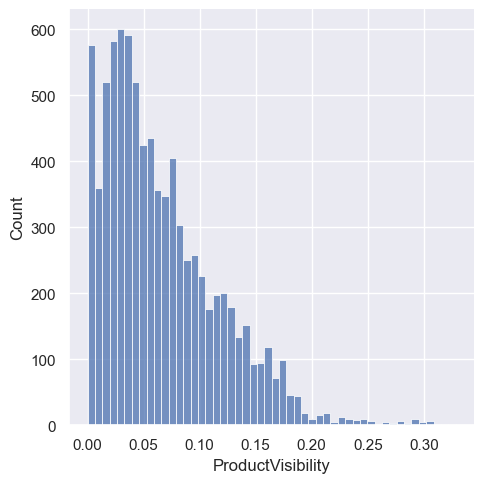

In [84]:
plt.figure(figsize=(6,6))
sns.displot(df['ProductVisibility'])
plt.show()
     

<Figure size 600x600 with 0 Axes>

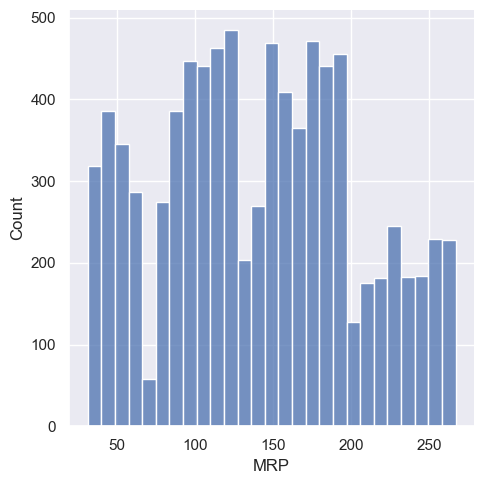

In [82]:
plt.figure(figsize=(6,6))
sns.displot(df['MRP'])
plt.show()

<Figure size 600x600 with 0 Axes>

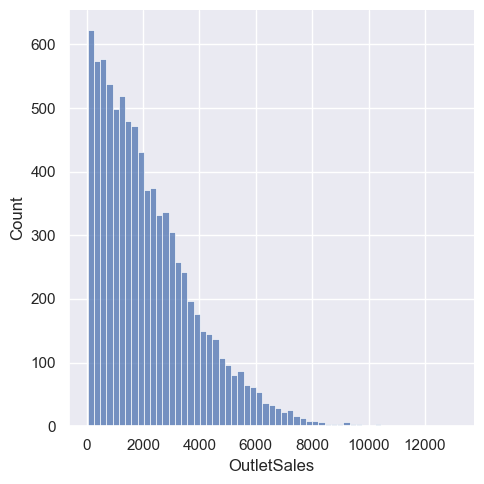

In [83]:
plt.figure(figsize=(6,6))
sns.displot(df['OutletSales'])
plt.show()

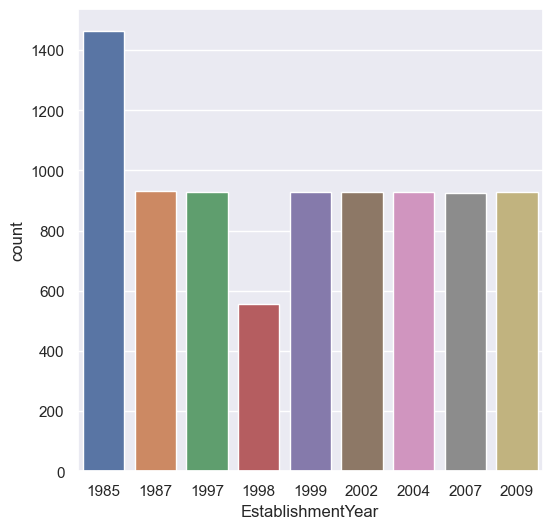

In [43]:
plt.figure(figsize=(6,6))
sns.countplot(x='EstablishmentYear',data=df)
plt.show()
     

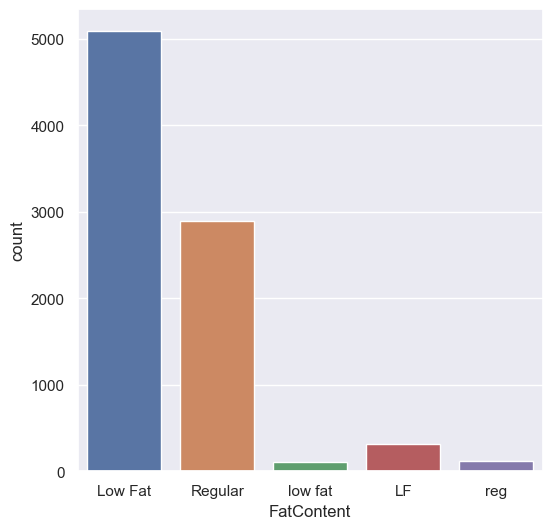

In [44]:
plt.figure(figsize=(6,6))
sns.countplot(x='FatContent',data=df)
plt.show()
     

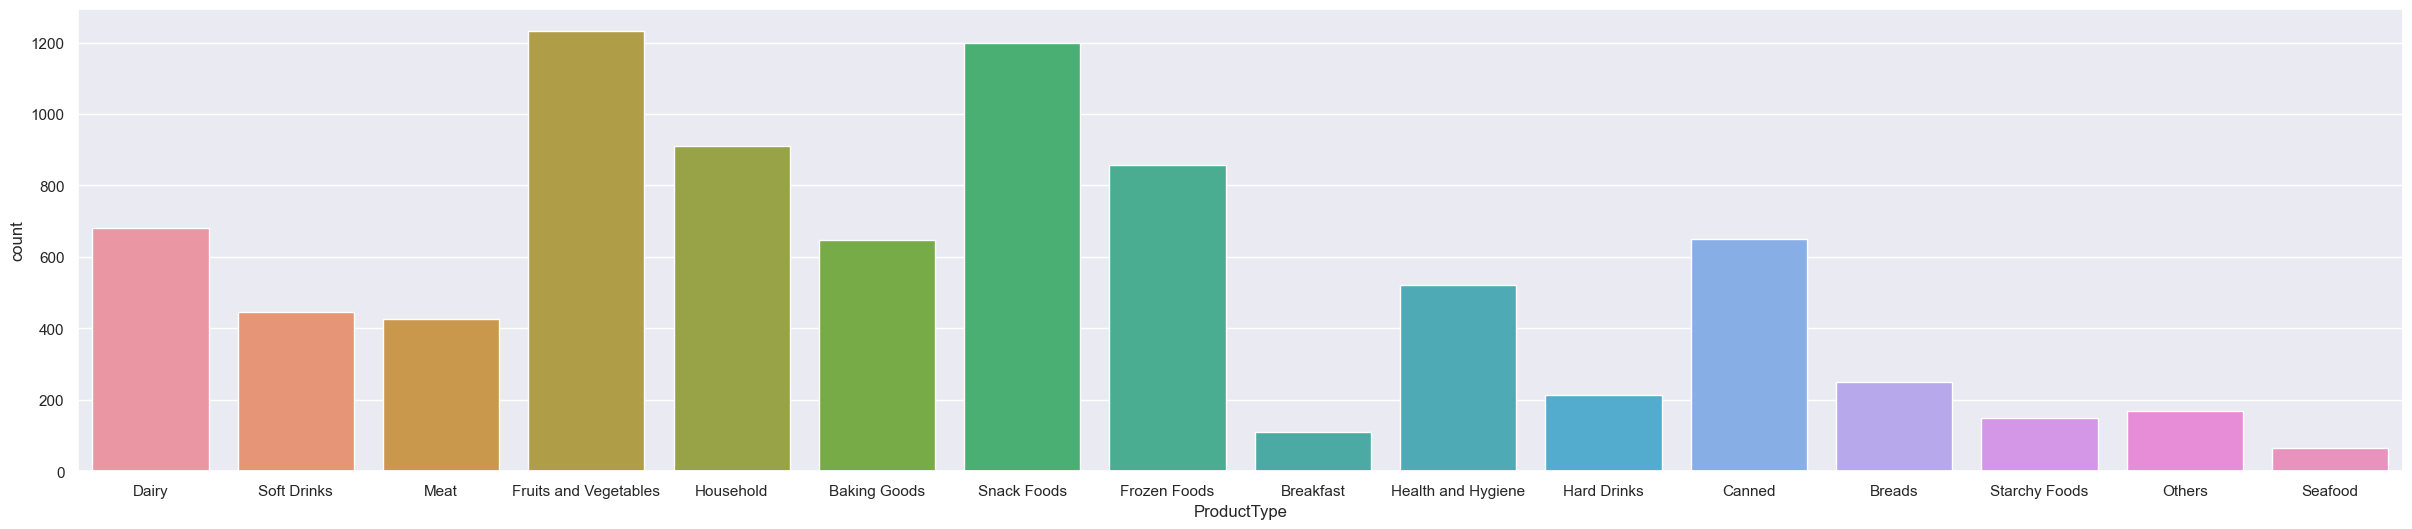

In [46]:
plt.figure(figsize=(30,6))
sns.countplot(x='ProductType',data=df)
plt.show()

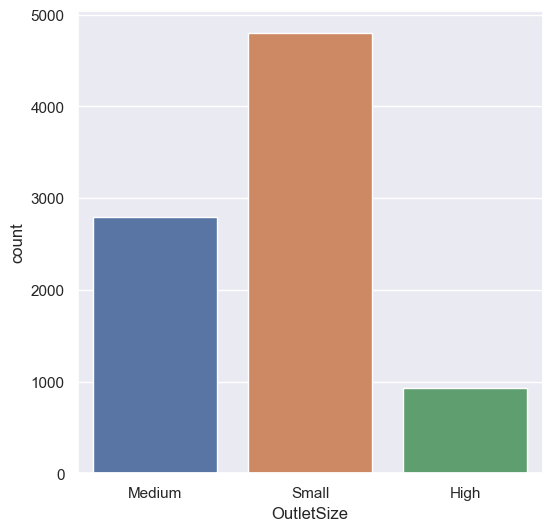

In [47]:
plt.figure(figsize=(6,6))
sns.countplot(x='OutletSize',data=df)
plt.show()
     

In [48]:
df.head()

ProductID Weight FatContent  ProductVisibility            ProductType  \
0     FDA15    9.3    Low Fat           0.016047                  Dairy   
1     DRC01   5.92    Regular           0.019278            Soft Drinks   
2     FDN15   17.5    Low Fat           0.016760                   Meat   
3     FDX07   19.2    Regular           0.000000  Fruits and Vegetables   
4     NCD19   8.93    Low Fat           0.000000              Household   

        MRP OutletID  EstablishmentYear OutletSize LocationType  \
0  249.8092   OUT049               1999     Medium       Tier 1   
1   48.2692   OUT018               2009     Medium       Tier 3   
2  141.6180   OUT049               1999     Medium       Tier 1   
3  182.0950   OUT010               1998      Small       Tier 3   
4   53.8614   OUT013               1987       High       Tier 3   

          OutletType  OutletSales  
0  Supermarket Type1    3735.1380  
1  Supermarket Type2     443.4228  
2  Supermarket Type1    2097.2700  
3      Grocery Store     732.3800  
4  Supermarket Type1     994.7052

In [49]:
df['FatContent'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: FatContent, dtype: int64

In [50]:
df.replace({'FatContent':{'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [51]:
df['FatContent'].value_counts()


Low Fat    5517
Regular    3006
Name: FatContent, dtype: int64

In [52]:
encoder = LabelEncoder()

In [54]:
df['ProductID'] = encoder.fit_transform(df['ProductID'])

df['FatContent'] = encoder.fit_transform(df['FatContent'])

df['ProductType'] = encoder.fit_transform(df['ProductType'])

df['OutletID'] = encoder.fit_transform(df['OutletID'])

df['OutletSize'] = encoder.fit_transform(df['OutletSize'])

df['LocationType'] = encoder.fit_transform(df['LocationType'])

df['OutletType'] = encoder.fit_transform(df['OutletType'])

In [69]:
X=df.drop(columns='OutletSales', axis=1)
Y=df['OutletSales']

In [70]:
X=df.drop(columns='Weight', axis=1)

In [71]:
print(X)

      ProductID  FatContent  ProductVisibility  ProductType       MRP  \
0           156           0           0.016047            4  249.8092   
1             8           1           0.019278           14   48.2692   
2           662           0           0.016760           10  141.6180   
3          1121           1           0.000000            6  182.0950   
4          1297           0           0.000000            9   53.8614   
...         ...         ...                ...          ...       ...   
8518        370           0           0.056783           13  214.5218   
8519        897           1           0.046982            0  108.1570   
8520       1357           0           0.035186            8   85.1224   
8521        681           1           0.145221           13  103.1332   
8522         50           0           0.044878           14   75.4670   

      OutletID  EstablishmentYear  OutletSize  LocationType  OutletType  \
0            9               1999           1   

In [72]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   int32  
 1   FatContent         8523 non-null   int32  
 2   ProductVisibility  8523 non-null   float64
 3   ProductType        8523 non-null   int32  
 4   MRP                8523 non-null   float64
 5   OutletID           8523 non-null   int32  
 6   EstablishmentYear  8523 non-null   int64  
 7   OutletSize         8523 non-null   int32  
 8   LocationType       8523 non-null   int32  
 9   OutletType         8523 non-null   int32  
 10  OutletSales        8523 non-null   float64
dtypes: float64(3), int32(7), int64(1)
memory usage: 499.5 KB


In [58]:
print(Y)


0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: OutletSales, Length: 8523, dtype: float64


In [73]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [74]:
regressor = XGBRegressor()

In [75]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [76]:
training_data_prediction=regressor.predict(X_train)

In [77]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [78]:
print('R Squared value = ', r2_train)

R Squared value =  0.9999938310321731


In [79]:
test_data_prediction=regressor.predict(X_test)

In [80]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [81]:
print('R Squared value = ', r2_test)

R Squared value =  0.9999490646058384


In [85]:
import joblib

joblib.dump(regressor, 'sales_prediction_model.joblib')


['sales_prediction_model.joblib']